# **Healthcare Analysis** 

*Importing Libraries* 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

*Extracting Dataset in CSV format from the system using Pandas Library*

In [2]:
data=pd.read_csv('/content/Heart disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


*Rows and Columns in the dataset*

In [3]:
data.shape

(303, 14)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

***There are fourteen features in Dataset***
*   age (Age in years)
*   sex : (1 = male, 0 = female)
*   cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2:   non-anginal pain, 3: typical angina]
*   trestbps (Resting Blood Pressure in mm/hg )
*   chol (Serum Cholesterol in mg/dl)
*   fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
*   restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality]
*   thalach (maximum heart rate achieved)
*   exang (Exercise Induced Angina): [1 = yes, 0 = no]
*  oldpeak (ST depression induced by exercise relative to rest)
*  slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]
*  ca [number of major vessels (0–3)
*  thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]
*  target: [0 = disease, 1 = no disease]




In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


*Checking for null values*

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

* There are No Missing values in the dataset

*Checking for duplicate data*

In [7]:

duplicate=data.duplicated().sum()
if duplicate:
  print("Duplicate rows are:{}".format(duplicate))
else:
  print("No duplicate values")

Duplicate rows are:1


In [8]:
duplicate_data=data[data.duplicated(keep=False)]
duplicate_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


*Statistics Summary*

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#**Percentage of people having Heart Disease**

In [10]:
target=data.groupby('target').size()
target

target
0    138
1    165
dtype: int64

*Converting Numerical Data into Categorical Data* 

In [11]:
data['target']=data.target.replace({1:"Disease",0:"No_Disease"})
data['sex']=data.sex.replace({1:"Male",0:"Female"})
data['cp']=data.cp.replace({0:"Typical_Angina",1:"Atypical_Angina",2:"Non-Anginal Pain",3:"Asymtomatic"})
data['fbs']=data.fbs.replace({1:"True",0:"False"})
data['exang']=data.exang.replace({1:"Yes",0:"No"})
data['thal']=data.thal.replace({1:"Normal",2:"Fixed Dfect",3:"Reversible Defect"})
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymtomatic,145,233,True,0,150,No,2.3,0,0,Normal,Disease
1,37,Male,Non-Anginal Pain,130,250,False,1,187,No,3.5,0,0,Fixed Dfect,Disease
2,41,Female,Atypical_Angina,130,204,False,0,172,No,1.4,2,0,Fixed Dfect,Disease
3,56,Male,Atypical_Angina,120,236,False,1,178,No,0.8,2,0,Fixed Dfect,Disease
4,57,Female,Typical_Angina,120,354,False,1,163,Yes,0.6,2,0,Fixed Dfect,Disease


In [12]:
heart_disease=data.groupby('target').size()
heart_disease

target
Disease       165
No_Disease    138
dtype: int64

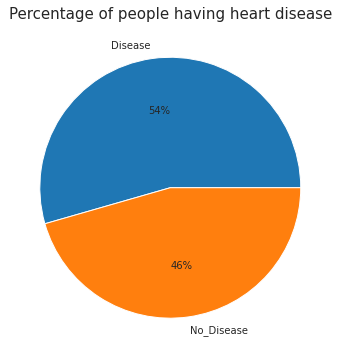

In [13]:
plt.figure(figsize=(10,6))
plt.pie(heart_disease,labels=['Disease','No_Disease'], autopct='%0.0f%%')
plt.title('Percentage of people having heart disease', fontsize=15)
plt.show()

*People suffering from heart disease constitutes of 54% of the total population*

# **Age Variable Distribution**

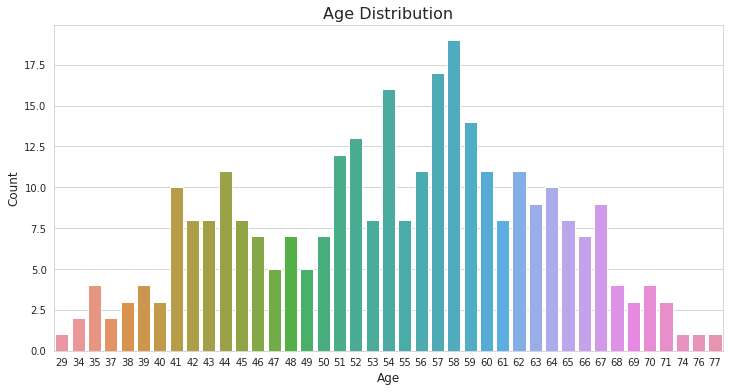

In [14]:
#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(12,6))
sns.countplot(x='age',data=data)
plt.title('Age Distribution',fontsize=16)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

* Most of the patients are in the age group 50-60.

* For better understanding and meaningful analysis we will divide the age into 3 different categories:
 1. Young
 2. Middle_Aged
 3. Old_Aged 

*Statistical Analysis of Age*

In [15]:
Min=data['age'].min()
Max=data['age'].max()
Mean_age=data['age'].mean()
print('Minimum Age:',Min)
print('Maximum Age:', Max)
print('Mean Age:',Mean_age)

Minimum Age: 29
Maximum Age: 77
Mean Age: 54.366336633663366


*Categorical Analysis*

In [16]:
Young=data[(data['age']>=29) & (data['age']<40)]
print("young:",len(Young))
Middle_Aged=data[(data['age']>=40) & (data['age']<55)]
print('Middle_Aged:',len(Middle_Aged))
Elderly_Aged=data[(data['age']>=55)]
print("Elderly:",len(Elderly_Aged))

young: 16
Middle_Aged: 128
Elderly: 159


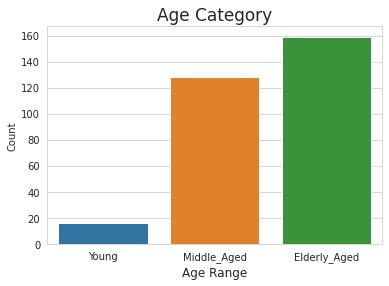

In [17]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn

sns.barplot(x=['Young','Middle_Aged','Elderly_Aged'],y=[len(Young),len(Middle_Aged),len(Elderly_Aged)])
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range',fontsize=12)
plt.ylabel('Count')
plt.show()


* young: 16
* Middle_Aged: 128
* Elderly: 159

*Converting Numerical 'Age' Data into Categorical Data*

In [18]:
def Age_range(a):
  if a>=29 and a<40:
    return 'Young'
  elif a>=40 and a<55:
    return 'Middle_Aged'
  elif a>=55:
    return 'Elderly_Aged'

data['Age_Range']=data['age'].apply(Age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Range
0,63,Male,Asymtomatic,145,233,True,0,150,No,2.3,0,0,Normal,Disease,Elderly_Aged
1,37,Male,Non-Anginal Pain,130,250,False,1,187,No,3.5,0,0,Fixed Dfect,Disease,Young
2,41,Female,Atypical_Angina,130,204,False,0,172,No,1.4,2,0,Fixed Dfect,Disease,Middle_Aged
3,56,Male,Atypical_Angina,120,236,False,1,178,No,0.8,2,0,Fixed Dfect,Disease,Elderly_Aged
4,57,Female,Typical_Angina,120,354,False,1,163,Yes,0.6,2,0,Fixed Dfect,Disease,Elderly_Aged


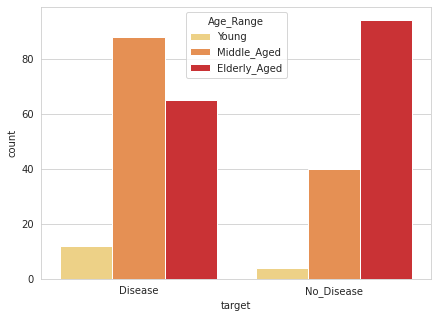

In [19]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
hue_order=['Young','Middle_Aged','Elderly_Aged']
sns.countplot(x='target',hue='Age_Range',data=data, hue_order=hue_order,palette='YlOrRd')

* Middle Aged people are most affected by Heart Disease 

-----------------------

*Bar Plot Creation of Gender Based Age Category using MatplotLib and Seaborn*

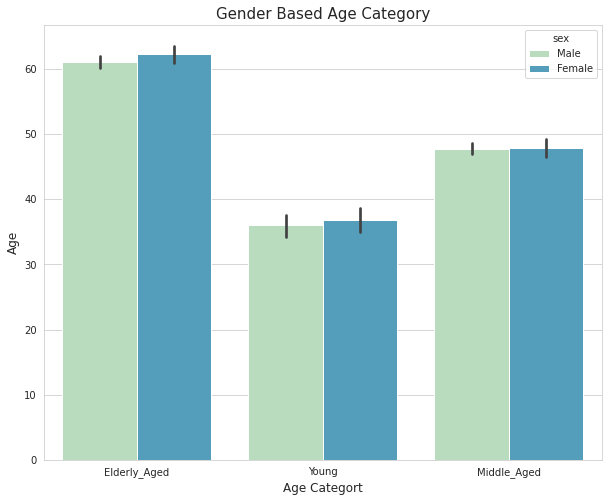

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x='Age_Range',y='age',hue='sex',data=data, palette='GnBu')
plt.title('Gender Based Age Category',fontsize=15)
plt.xlabel('Age Categort',fontsize=12)
plt.ylabel('Age',fontsize=12)
plt.show()

* In our dataset Males are more in  Middle Age Category and Females are more in Elderly Age category 

#**Gender Distribution According to Target Variable**

Text(0, 0.5, 'Count')

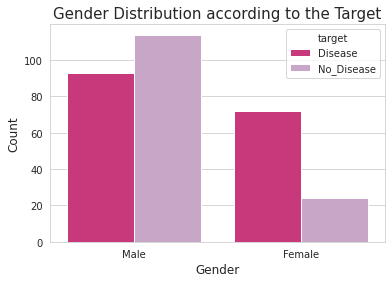

In [21]:
# CountPlot Creation of Gender Based Age Category using MatplotLib and Seaborn

sns.countplot(x='sex',hue='target',data=data,palette='PuRd_r')
plt.title('Gender Distribution according to the Target', fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Count',fontsize=12)

* We can infer that among Male heart disease patients are higher than Female heart disease patients i.e. **Males are more prone to heart diseases**

#**Chest Pain Distribution According to Target Variable** 

Text(0, 0.5, 'Count')

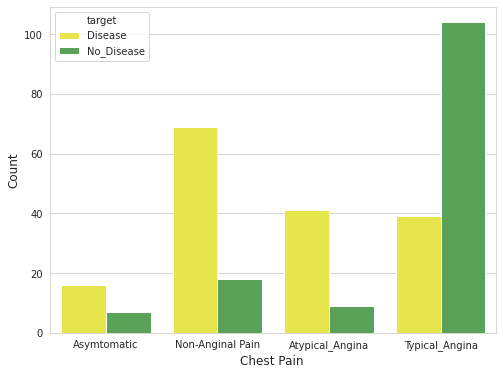

In [22]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

plt.figure(figsize=(8,6))
sns.countplot(x='cp',hue='target',data=data,palette='Set1_r')
plt.xlabel('Chest Pain ',fontsize=12)
plt.ylabel('Count',fontsize=12)

* higher number of healthy subjects have Typical_Angina
 can be subjective to stress, physical activities and many more and varies between gender. 


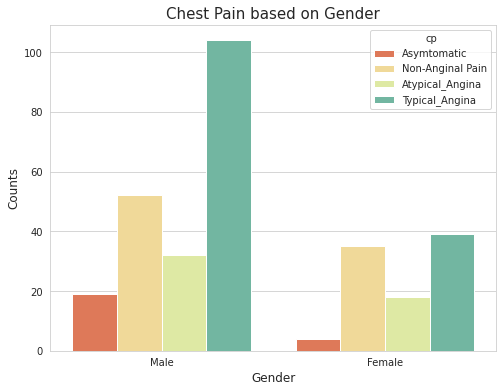

In [23]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn

plt.figure(figsize=(8,6))
sns.countplot(x='sex', hue='cp',data=data,palette='Spectral')
plt.title('Chest Pain based on Gender',fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.show()


* We can see that a higher number of men are suffering from Typical Angina of Chest Pain

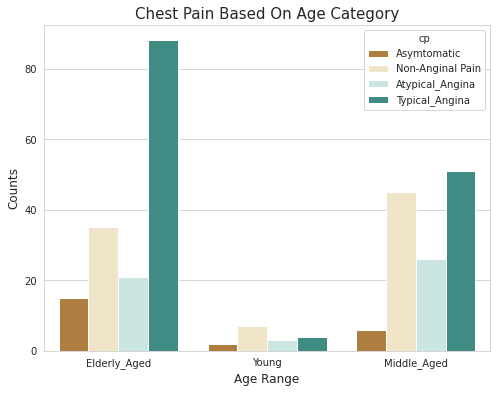

In [24]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(8,6))
sns.countplot(x='Age_Range', hue='cp', data=data, palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=15)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

* subjects in Elderly Age category i.e. above 55 suffer from Typical Angina


#**Blood Pressure** 

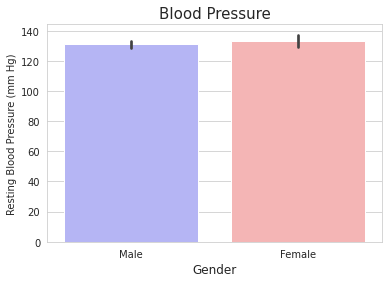

In [25]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

sns.barplot(x='sex', y='trestbps', data=data, palette='bwr')
plt.title("Blood Pressure", fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel("Resting Blood Pressure (mm Hg)", fontsize=10)
plt.show()

* Blood Pressure Levels are  almost equal in both Males and Females


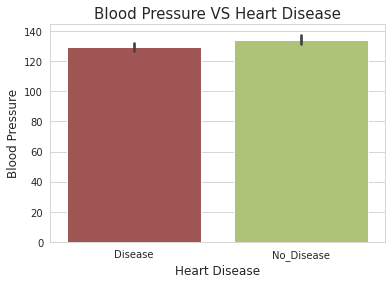

In [26]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn


sns.barplot(x='target', y='trestbps', data=data, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=15)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.show()

* Higher Blood Pressure Level results  Chances Of Heart Disease


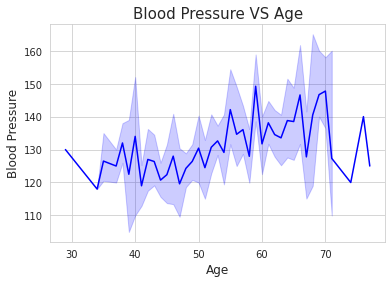

In [27]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='trestbps', data=data, color='b')
plt.title('Blood Pressure VS Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.show()

* We can infer that Blood Pressure Levels increase between age group 50-60 and continues till 70


#**Cholestrol** 


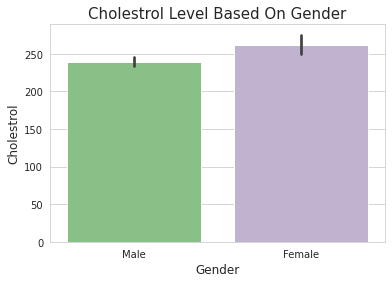

In [28]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

sns.barplot(x='sex', y='chol', data=data,palette='Accent')
plt.title("Cholestrol Level Based On Gender", fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel("Cholestrol", fontsize=12)
plt.show()

* Females have little bit of higher cholesterol than Males


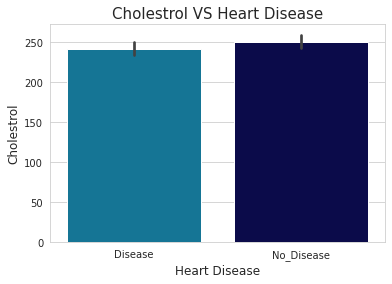

In [29]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='target', y='chol', data=data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=15)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Cholestrol', fontsize=12)
plt.show()

* Higher Cholestrol Levels results chances of Heart Disease

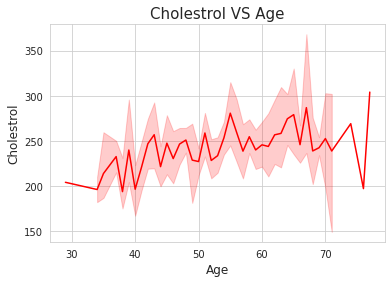

In [30]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='chol', data=data, color='r')
plt.title('Cholestrol VS Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholestrol', fontsize=12)
plt.show()

*  We can infer that Cholestrol Level increases in the age group 50-60 and continues to increase till 70

# **Fasting blood sugar distribution according to target variable**


Text(0, 0.5, 'Count')

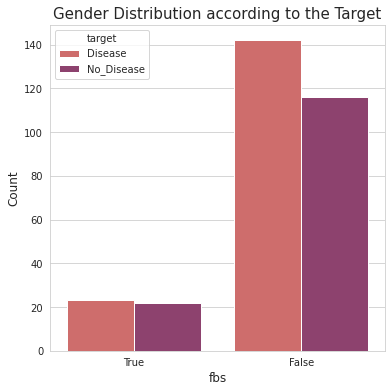

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x='fbs',hue='target',data=data,palette='flare')
plt.title('Gender Distribution according to the Target', fontsize=15)
plt.xlabel('fbs',fontsize=12)
plt.ylabel('Count',fontsize=12)

* Fasting blood sugar or fbs is a diabetes indicator with fbs >120 mg/d is considered diabetic (True class)

* we observe that the number for class true, is lower compared to class false

* However,there are higher number of heart disease patient without diabetes. 

* hence fbs might **not be a strong feature differentiating between heart disease an non-disease patient**.

In [32]:
data.to_csv('Healthcare.csv')

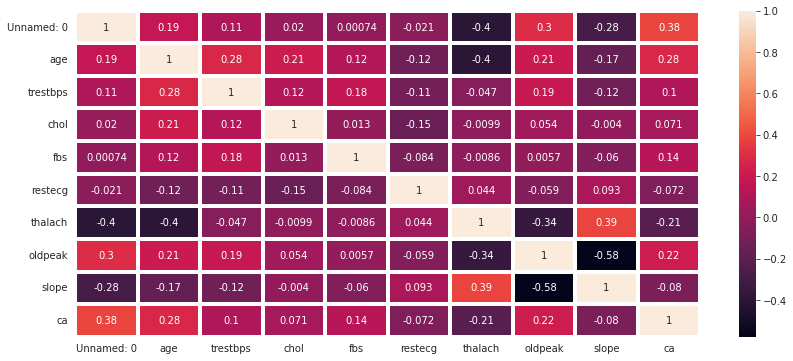

In [35]:
plt.figure(figsize=(14,6))
df=pd.read_csv('/content/Healthcare.csv')
sns.heatmap(df.corr(), annot=True, linewidth=3)